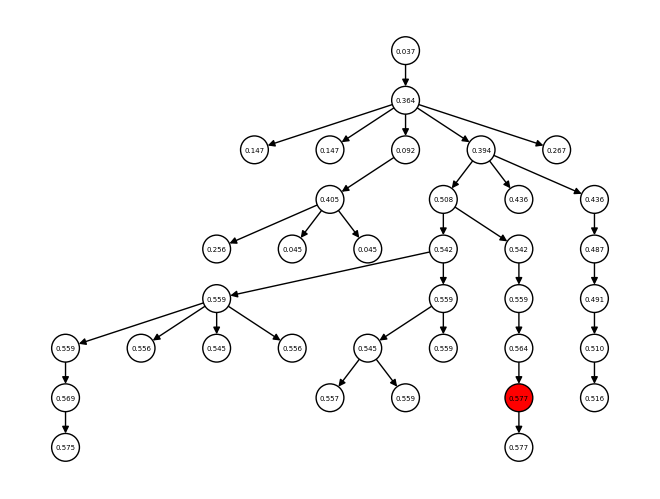

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

import sempipes
from sempipes.optimisers.trajectory import load_trajectory_from_json

# This requires a trajectory to be present
trajectory = load_trajectory_from_json(".sempipes_trajectories/fraudbaskets_20251119_214821_b02b97dd.json")

attributes = {}
edges = []

for outcome in trajectory.outcomes:
    node_id = outcome.search_node.trial
    if outcome.search_node.parent_trial is not None:
        parent_node_id = outcome.search_node.parent_trial
        edges.append((parent_node_id, node_id))
    attributes[node_id] = {"score": f"{outcome.score:.3f}"}

G = nx.DiGraph()
G.add_edges_from(edges)
nx.set_node_attributes(G, attributes)

# Identify node with highest score
best_node = max(attributes, key=lambda n: attributes[n]["score"])
#print(f"Best node: {best_node}, score: {attributes[best_node]['score']:.3f}")

# Assign colors (red for best node)
node_colors = [
    "red" if node == best_node else "white"
    for node in G.nodes()
]

G.graph['graph'] = {'ranksep': '50.0', 'nodesep': '50.0'}  

labels = nx.get_node_attributes(G, "score")
pos = nx.nx_pydot.graphviz_layout(G, prog="dot")


nx.draw(
    G,
    pos,
    with_labels=True,
    labels=labels,
    arrows=True,
    node_size=400,
    node_color=node_colors,#"white",
    edgecolors="black",
    font_size=5,
)
plt.show()